In [283]:
import os
print(os.getcwd())

C:\Housing Price Prediction Dataset


# Changing Directory

In [285]:
os.chdir(r"C:\Housing Price Prediction Dataset")

# Importing Libraries

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Collection

In [289]:
import os
print(os.listdir(r'C:\Housing Price Prediction Dataset'))

['Housing.csv']


In [290]:
house=pd.read_csv('Housing.csv')

# Inspecting data

In [292]:
house.shape

(545, 13)

In [293]:
house.describe

<bound method NDFrame.describe of                 price    area(Sq.feet)   bedrooms  bathrooms  stories  \
0     $1,33,00,000.00              7420         4          2        3   
1     $1,22,50,000.00              8960         4          4        4   
2     $1,22,50,000.00              9960         3          2        2   
3     $1,22,15,000.00              7500         4          2        2   
4     $1,14,10,000.00              7420         4          1        2   
..                 ...              ...       ...        ...      ...   
540     $18,20,000.00              3000         2          1        1   
541     $17,67,150.00              2400         3          1        1   
542     $17,50,000.00              3620         2          1        1   
543     $17,50,000.00              2910         3          1        1   
544     $17,50,000.00              3850         3          1        2   

    mainroad guestroom basement hotwaterheating airconditioning  parking  \
0        yes 

In [294]:
print(house.head())

              price    area(Sq.feet)   bedrooms  bathrooms  stories mainroad  \
0   $1,33,00,000.00              7420         4          2        3      yes   
1   $1,22,50,000.00              8960         4          4        4      yes   
2   $1,22,50,000.00              9960         3          2        2      yes   
3   $1,22,15,000.00              7500         4          2        2      yes   
4   $1,14,10,000.00              7420         4          1        2      yes   

  guestroom basement hotwaterheating airconditioning  parking prefarea  \
0        no       no              no             yes        2      yes   
1        no       no              no             yes        3       no   
2        no      yes              no              no        2      yes   
3        no      yes              no             yes        3      yes   
4       yes      yes              no             yes        2       no   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-fu

# Data Cleaning Processing

In [296]:
house.columns = house.columns.str.strip().str.lower()

In [297]:
# Step 1: Convert to string in case of mixed types
house['price'] = house['price'].astype(str)

# Step 2: Remove dollar sign and commas using raw string
house['price'] = house['price'].str.replace(r'[\$,]', '', regex=True)

# Step 3: Remove whitespace
house['price'] = house['price'].str.strip()

# Step 4: Convert to float
house['price'] = house['price'].astype(float)

In [298]:
print(house['price'].head())
print(house['price'].dtype)

0    13300000.0
1    12250000.0
2    12250000.0
3    12215000.0
4    11410000.0
Name: price, dtype: float64
float64


In [299]:
house = house.dropna()

In [300]:
house.shape

(545, 13)

## Encode Categorical Variables using binary mapping

In [302]:
new = ['mainroad', 'guestroom', 'basement', 
               'hotwaterheating', 'airconditioning', 'prefarea']
for i in new:
    house[i] = house[i].map({'yes': 1, 'no': 0})


## One-Hot Encode

In [304]:
house = pd.get_dummies(house, columns=['furnishingstatus'], drop_first=True)

In [305]:
house

,price,area(sq.feet),bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000.0,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000.0,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000.0,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000.0,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000.0,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150.0,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000.0,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000.0,2910,3,1,1,0,0,0,0,0,0,0,False,False


## Selecting Features and Target

In [307]:
Features = house[['area(sq.feet)' , 'bedrooms', 'bathrooms', 'stories', 'mainroad',
        'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
        'parking', 'prefarea', 'furnishingstatus_semi-furnished',
        'furnishingstatus_unfurnished']]
Target = house['price']


## Splitting Data

In [309]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

# Builidng Linear Regression Model

In [311]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Evaluate the model

In [313]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1754318687330.6643
R-squared: 0.6529242642153184


# Visualizing the Results

## 1.Actual vs. Predicted Prices:

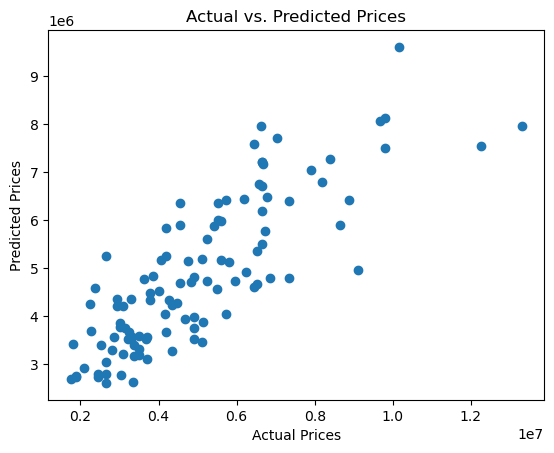

In [316]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

## 2.Residuals Plot

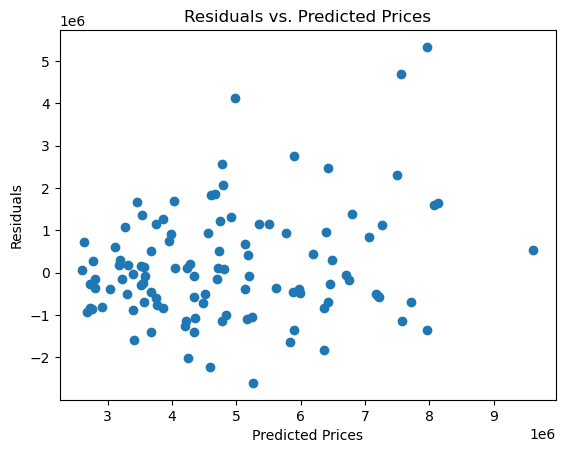

In [318]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()